In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("OnlineRetail.csv" , encoding="latin1")
# data.head(10)

⬇⬇⬇ Monthly Revenue ⬇⬇⬇

In [3]:
#converting the type of Invoice Date Field from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

data['Revenue'] = data['UnitPrice'] * data['Quantity']

tx_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index() # reset_index az tavabeh ketabkhane pandas hast

tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


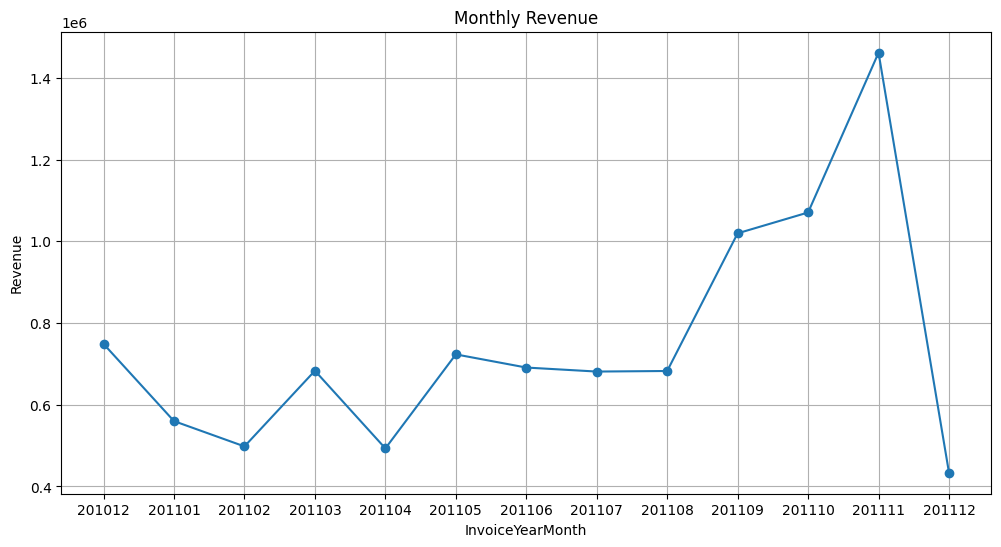

In [4]:
plt.figure(figsize=(12, 6))  #تغییر سایز نمودار
plt.title("Monthly Revenue")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Revenue")
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['Revenue'], marker='o')  
plt.grid()
plt.show()



⬇⬇⬇ Monthly Growth Rate ⬇⬇⬇

In [5]:
#using pct_change() function to see monthly percentage change 
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


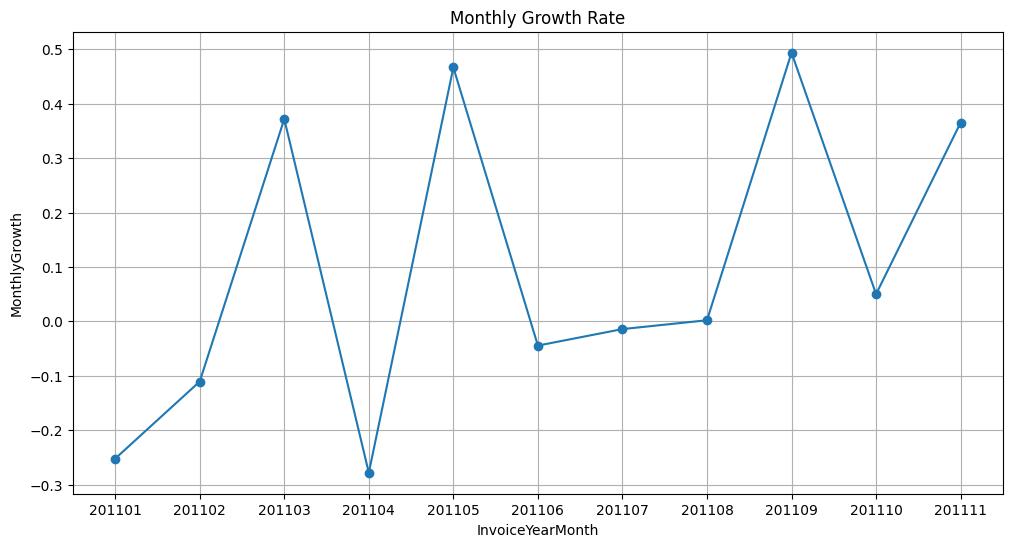

In [6]:
plt.figure(figsize=(12, 6))  #تغییر سایز نمودار
plt.title("Monthly Growth Rate")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("MonthlyGrowth")
plt.plot(tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'], marker='o')  
plt.grid()
plt.show()

⬇⬇⬇ Monthly Active Customer ⬇⬇⬇

In [7]:
#creating a new dataframe with UK customers only # bishtar moshtariha az engelestan hastan
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index() 

#print the dataframe
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


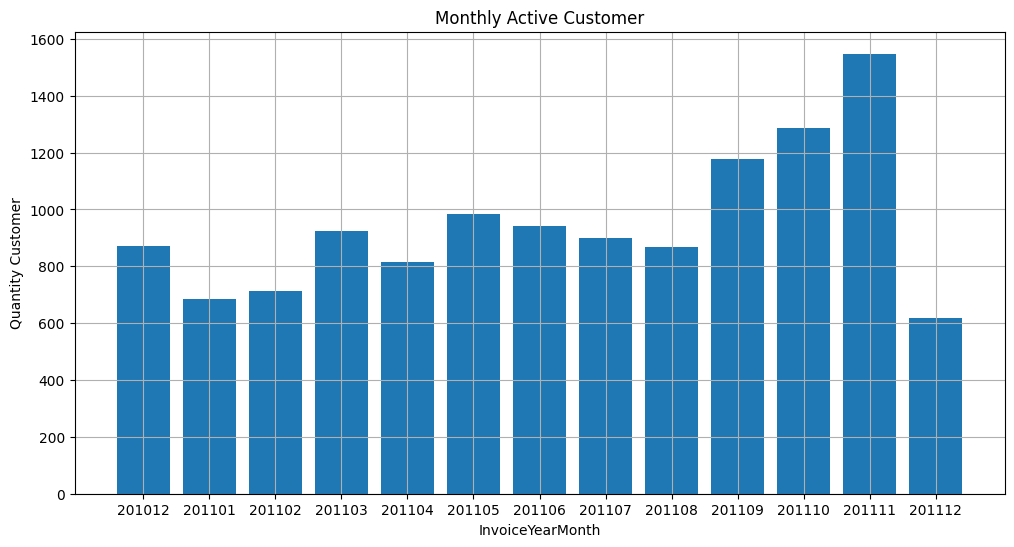

In [8]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_active['CustomerID'].to_numpy())
plt.grid()

plt.title("Monthly Active Customer")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Quantity Customer")

plt.show()

⬇⬇⬇ Monthly Order Count ⬇⬇⬇

In [10]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


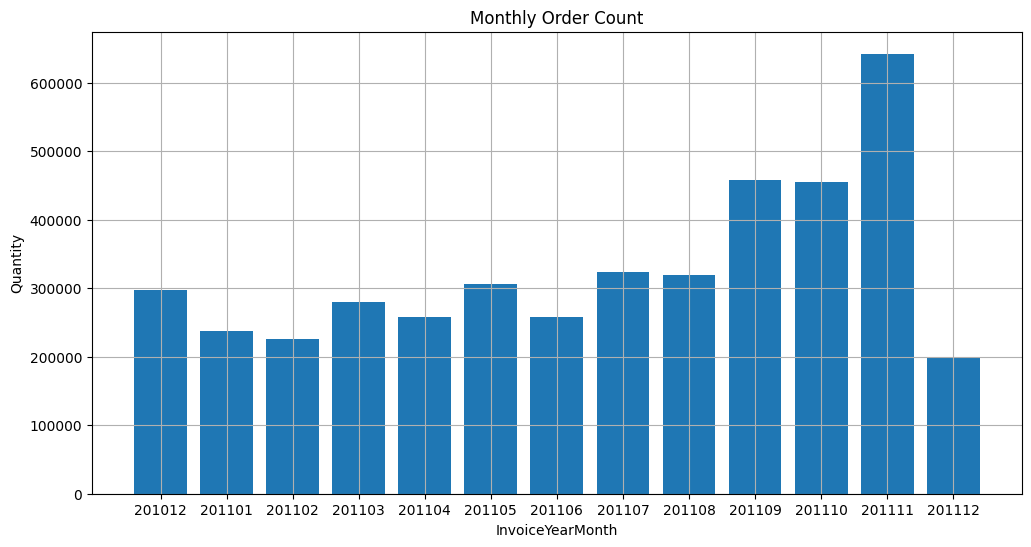

In [11]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_sales['Quantity'].to_numpy())
plt.grid()

plt.title("Monthly Order Count")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Quantity")

plt.show()

⬇⬇⬇ Average Revenue per Order ⬇⬇⬇

In [12]:
# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()  # mean: میانگین گرفته

#print the dataframe
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


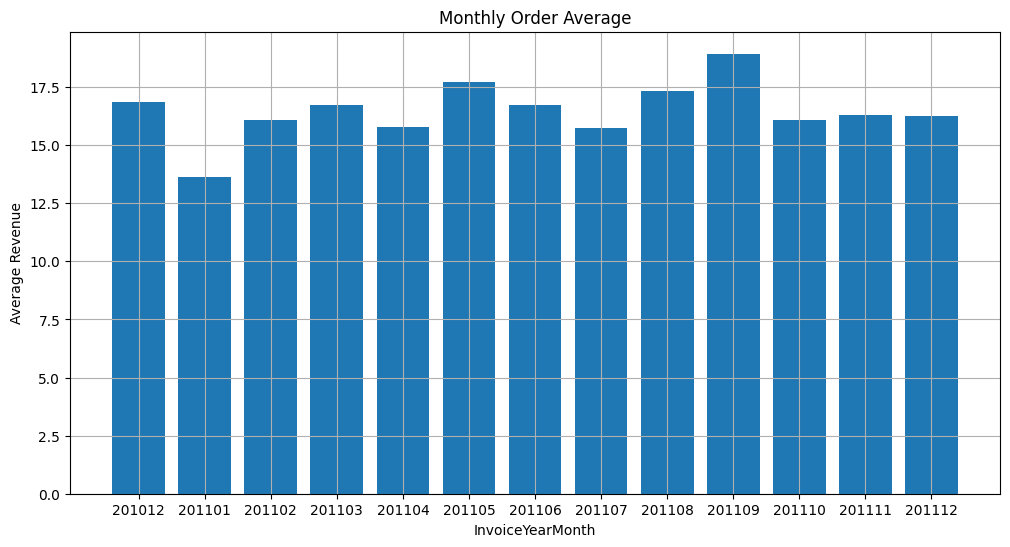

In [13]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_order_avg['Revenue'].to_numpy())
plt.grid()

plt.title("Monthly Order Average")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Average Revenue")

plt.show()

New Customer Ratio ⬇⬇⬇

In [16]:
#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate_x,MinPurchaseYearMonth_x,MinPurchaseDate_y,MinPurchaseYearMonth_y,UserType,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012


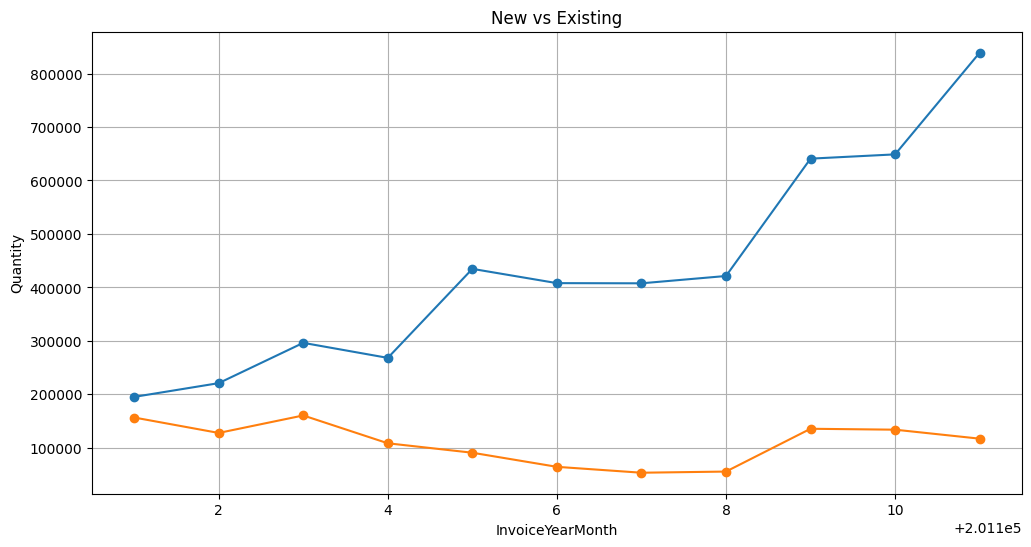

In [23]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

plt.figure(figsize=(12, 6))  #تغییر سایز نمودار
plt.title("New vs Existing")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Quantity")

plt.plot(tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'], tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'], marker="o") 
plt.plot(tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'], tx_user_type_revenue.query("UserType == 'New'")['Revenue'], marker="o") 


plt.grid()
plt.show()


In [24]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


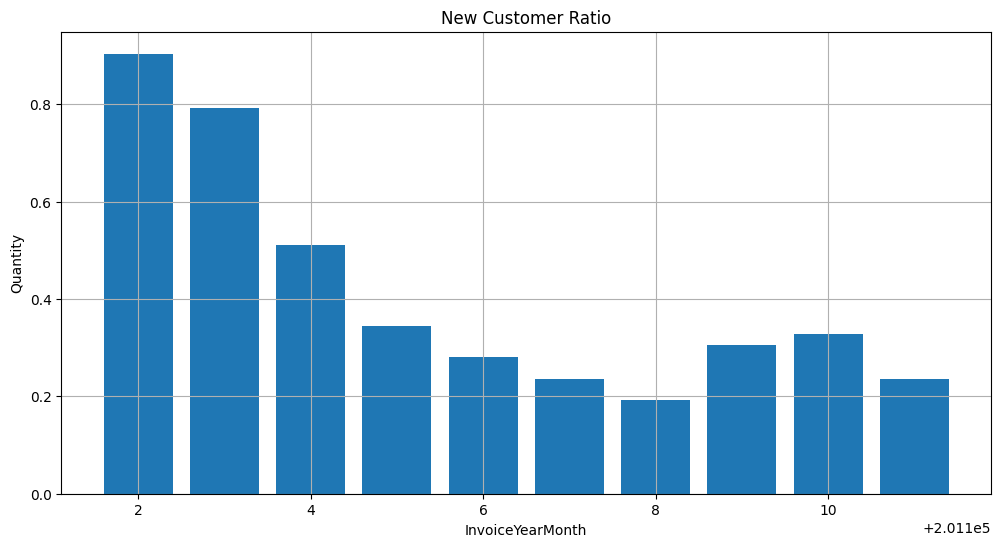

In [25]:
plt.figure(figsize=(12,6))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'], tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'])
plt.grid()

plt.title("New Customer Ratio")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Quantity")

plt.show()

Monthly Retention Rate ⬇⬇

In [32]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


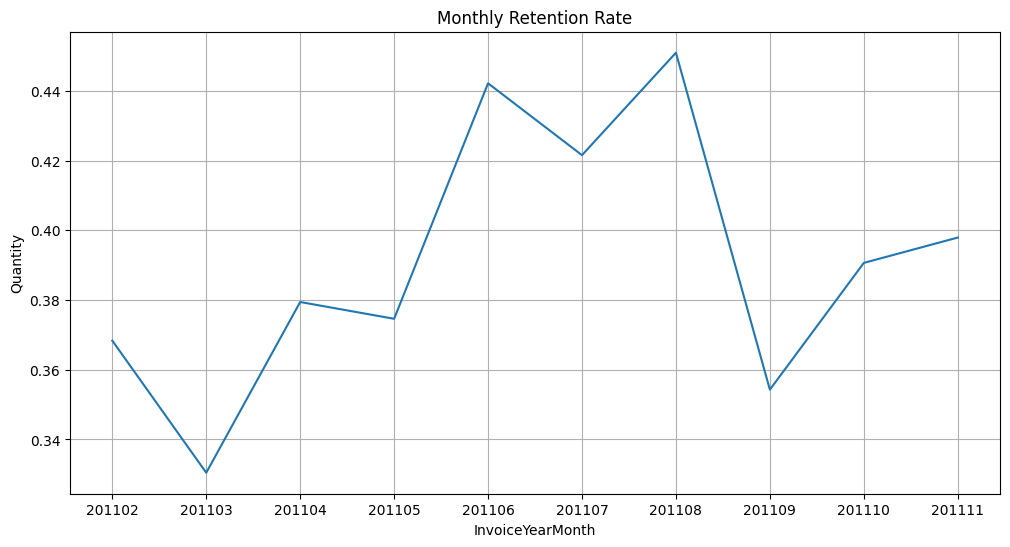

In [33]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']



plt.figure(figsize=(12, 6))  #تغییر سایز نمودار
plt.title("Monthly Retention Rate")
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Quantity")
plt.plot(tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'])  
plt.grid()
plt.show()